In [1]:
from qiskit_experiments.framework import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit_aer import AerSimulator

# For simulation
from qiskit.providers.fake_provider import FakeSydneyV2

backend = AerSimulator.from_backend(FakeSydneyV2())

In [2]:
qubits = tuple(range(4)) # Can use specific qubits. for example [2, 4, 7, 10]

qv_exp = QuantumVolume(qubits, seed=42)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)

# Run experiment
expdata = qv_exp.run(backend).block_for_results()

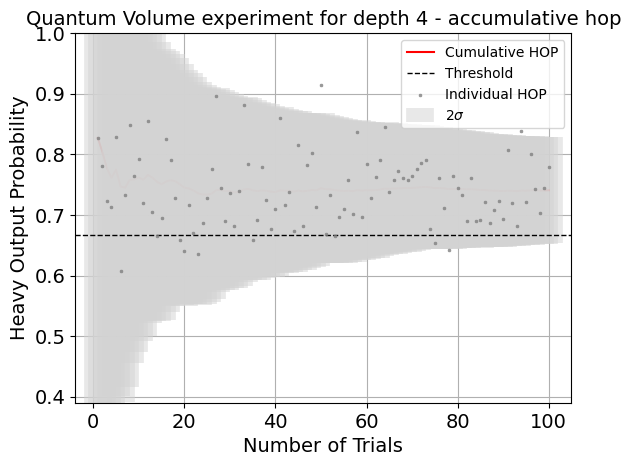

AnalysisResult
- name: mean_HOP
- value: 0.74+/-0.04
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [3]:
# View result data
display(expdata.figure(0))

for result in expdata.analysis_results():
    print(result)

In [4]:
# Print extra data
for result in expdata.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.8271484375, 0.7802734375, 0.7236328125, 0.7138671875, 0.8291015625, 0.607421875, 0.7333984375, 0.84765625, 0.7646484375, 0.7919921875, 0.7197265625, 0.8544921875, 0.7041015625, 0.666015625, 0.6943359375, 0.8251953125, 0.791015625, 0.7275390625, 0.658203125, 0.6396484375, 0.7158203125, 0.6708984375, 0.634765625, 0.6865234375, 0.728515625, 0.7763671875, 0.896484375, 0.744140625, 0.689453125, 0.736328125, 0.681640625, 0.7392578125, 0.880859375, 0.7841796875, 0.6591796875, 0.6923828125, 0.779296875, 0.724609375, 0.6767578125, 0.708984375, 0.859375, 0.7158203125, 0.73828125, 0.673828125, 0.8154296875, 0.681640625, 0.7822265625, 0.8017578125, 0.7138671875, 0.9150390625, 0.6689453125, 0.732421875, 0.666015625, 0.6962890625, 0.708984375, 0.7578125, 0.701171875, 0.8369140625, 0.6962890625, 0.7841796875, 0.7275390625, 0.7626953125, 0.791015625, 0.8447265625, 0.73828125, 0.7568359375, 0.7724609375, 0.7607421875, 0.7578125, 0.7646484375, 0.7763671875, 0.78515625, 0.7910

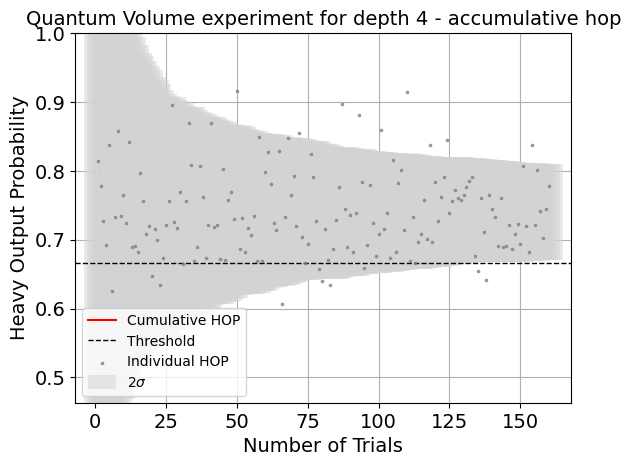

AnalysisResult
- name: mean_HOP
- value: 0.741+/-0.035
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 16
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [5]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, analysis=None).block_for_results()
expdata2.add_data(expdata.data())
qv_exp.analysis.run(expdata2).block_for_results()

# View result data
display(expdata2.figure(0))
for result in expdata2.analysis_results():
    print(result)

In [6]:
exps = [QuantumVolume(tuple(range(i)), trials=200) for i in range(3, 6)]

batch_exp = BatchExperiment(exps)
batch_exp.set_transpile_options(optimization_level=3)

# Run
batch_expdata = batch_exp.run(backend).block_for_results()

In [7]:
qv_values = [
    batch_expdata.child_data(i).analysis_results("quantum_volume").value
    for i in range(batch_exp.num_experiments)
]

print(f"Max quantum volume is: {max(qv_values)}")

Max quantum volume is: 32



Component experiment 0


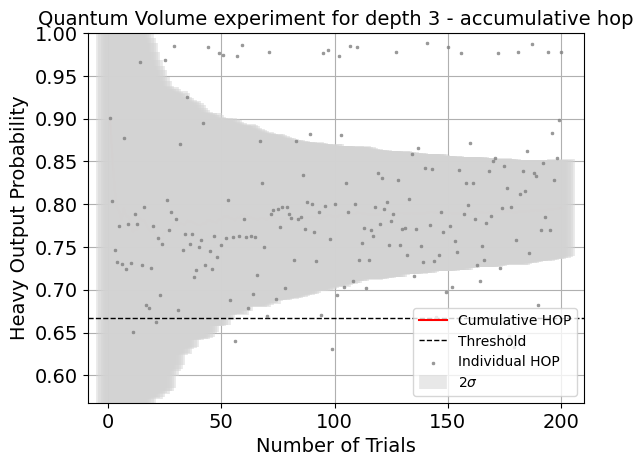

AnalysisResult
- name: mean_HOP
- value: 0.796+/-0.028
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 8
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False

Component experiment 1


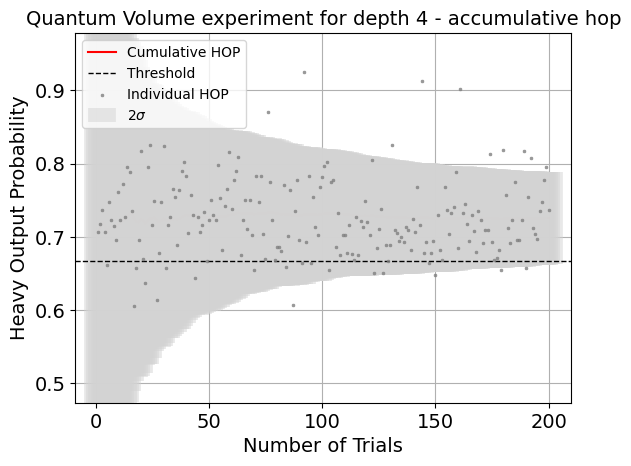

AnalysisResult
- name: mean_HOP
- value: 0.726+/-0.032
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False

Component experiment 2


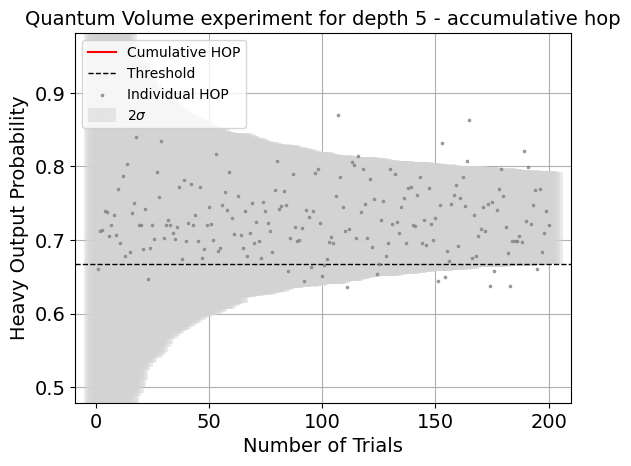

AnalysisResult
- name: mean_HOP
- value: 0.730+/-0.031
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 32
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False


In [8]:
for i in range(batch_exp.num_experiments):
    print(f"\nComponent experiment {i}")
    sub_data = batch_expdata.child_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)